In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import math
import matplotlib as mpl


In [2]:
mpl.rcParams['figure.dpi'] = 400


In [3]:
def fitness(z,Vs):
    return(np.exp(-(z**2)/(2*Vs)))
def delta_x_withvar(d,p,a,va,vs):
    
    numerator = math.exp(-((d + a * (-1 + p))**2 / (2 * (va + vs)))) / math.sqrt(1 +( va / vs)) - math.exp(-((d + a * p)**2 / (2 * (va + vs)))) / math.sqrt(1 +( va / vs))
    denominator = (math.exp(-((d + a * p)**2 / (2 * (va + vs)))) * (1 - p)) / math.sqrt(1 +( va / vs)) + (math.exp(-((d + a * (-1 + p))**2 / (2 * (va + vs)))) * p) / math.sqrt(1 +( va / vs))
    delta_x = numerator / denominator
    return delta_x*p*(1 - p)

def sample_d(Va,Vs,d):
    
    deltad=-(Va/Vs)*d
    
    
    return deltad

In [4]:
def custombinomial(n,p):
    counting1s=0
    for i in range(n):
        x = np.random.uniform()
        if x<p:
            counting1s=counting1s+1

    return(counting1s/n)

In [5]:
def single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens):
    d_t=d
    x_t=x
    replicates=[]
    
    for r in range(1):
        print(r)
        simulated_allele_trajectory=[]
        d_t=d
        x_t=x

        optimum_changed=[]
        optimum_changed.append(d_t)
        simulated_allele_trajectory.append(x_t)

        for i in range(gens-1):
            if(x_t>0):
                deltax=delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x(d_t,x_t,a,Vs)#delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x(d_t,x_t,a,Vs)#delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x(d_t,x_t,a,Vs)#delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x(d_t,x_t,a,Vs) #delta_x_withvar(d_t,x_t,a,Va,Vs)#delta_x(d_t,x_t,a,Vs) #delta_x_withvar(d_t,x_t,a,Va,Vs)#

                #x_t=custombinomial(1000,x_t+deltax)#np.random.binomial(1, x_t+deltax, 2*N)
                #x_t=np.cou(alleles==1)/(2*N) #=x_t+deltax#l
            
                x_t=x_t+deltax
            else:
                x_t=0
                
            deltad=sample_d(Va,Vs,d_t)

            d_t=deltad+d_t
            if(abs(d_t)<0.00001):
                d_t=0
            optimum_changed.append(d_t)
            print(d_t)
            simulated_allele_trajectory.append(x_t)
            
        replicates.append(simulated_allele_trajectory)
    return(replicates,optimum_changed)

In [6]:
def term3(a, d, p, va, vs):
    numerator = -a**3 * (d * (p - 1) * p * (d**2 * (6 * (p - 1) * p + 1) - 3 * (1 - 2 * p)**2 * (va + vs)))
    denominator = 6 * (va + vs)**3
    return numerator / denominator


In [7]:
def term2(a, d, p, va, vs):
    numerator = -a**2 * ((p - 1) * p * (2 * p - 1) * (-d**2 + va + vs))
    denominator = 2 * (va + vs)**2
    return numerator / denominator


In [8]:
def term1(a, d, p, va, vs):
    numerator =- a * d * (p - 1) * p
    denominator = va + vs
    return numerator / denominator


In [9]:
def my_second_order_approximation(p,d,va,vs,a,N):
    term1_value = term1(a, d, p, va, vs)
    term2_value = term2(a, d, p, va, vs)
    term3_value = term3(a, d, p, va, vs)
    result1 = term1_value 
    result2 = term1_value+term2_value 

    return result1,result2


In [10]:
def barton_approximation(p,d,va,vs,a,N):
    term1_value = (p*(1-p)/(va+vs))*d*a
    term2_value = -(p*(1-p)*(1/2-p)*a**2)/(va+vs)

    return term1_value+term2_value


In [11]:
def approximation_trajectory_term1(x,d,Va,Vs,a,N,gens):
    d_t=d
    x_t=x
    approximate_solution_all=[x_t]


    for i in range(gens-1):
        
        result1,result2=my_second_order_approximation(x_t,d_t,Va,Vs,a,N)
        

        x_t=x_t+result1 #i use the 2 terms to update
        
        deltad=sample_d(Va,Vs,d_t)

        d_t=deltad+d_t
        
        approximate_solution_all.append(x_t)

            

        
    return(approximate_solution_all)
    

In [12]:
def approximation_trajectory_term2(x,d,Va,Vs,a,N,gens):
    d_t=d
    x_t=x
    approximate_solution_all=[x_t]


    for i in range(gens-1):
        
        result1,result2=my_second_order_approximation(x_t,d_t,Va,Vs,a,N)
        

        x_t=x_t+result2 #i use the 2 terms to update
        
        deltad=sample_d(Va,Vs,d_t)

        d_t=deltad+d_t
        
        approximate_solution_all.append(x_t)

            

        
    return(approximate_solution_all)
    

In [13]:
def approximation_trajectory_barton(x,d,Va,Vs,a,N,gens):
    d_t=d
    x_t=x
    approximate_solution_all=[x_t]


    for i in range(gens-1):
        
        result1=barton_approximation(x_t,d_t,Va,Vs,a,N)
        

        x_t=x_t+result1 #use the 2 terms to update
        
        deltad=sample_d(Va,Vs,d_t)
        
        d_t=deltad+d_t
        
        approximate_solution_all.append(x_t)

            

        
    return(approximate_solution_all)
    

In [35]:
#test 1
x=0.1
d=5
Va=0.1
Vs=5
a=0.005
N=1000
gens_n=10000

In [36]:
trajectory_simulated,optimum_trajectory=single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens_n)


0
4.9
4.8020000000000005
4.70596
4.6118408
4.519603984000001
4.429211904320001
4.3406276662336
4.253815112908928
4.1687388106507495
4.085364034437735
4.00365675374898
3.9235836186740003
3.8451119463005203
3.7682097073745098
3.6928455132270197
3.6189886029624794
3.5466088309032298
3.475676654285165
3.406163121199462
3.3380398587754727
3.271279061599963
3.205853480367964
3.1417364107606045
3.0789016825453923
3.0173236488944846
2.956977175916595
2.897837632398263
2.839880879750298
2.783083262155292
2.7274215969121864
2.6728731649739426
2.619415701674464
2.567027387640975
2.515686839888155
2.465373103090392
2.416065641028584
2.3677443282080124
2.320389441643852
2.273981652810975
2.2285020197547554
2.1839319793596603
2.140253339772467
2.097448272977018
2.0554993075174774
2.014389321367128
1.9741015349397855
1.9346195042409897
1.89592711415617
1.8580085718730466
1.8208484004355856
1.784431432426874
1.7487428037783366
1.7137679477027699
1.6794925887487144
1.6459027369737402
1.6129846822342655

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


# optimum_trajectory

In [37]:
#plt.plot(optimum_trajectory)
#plt.xlabel("gens")
#plt.title("Vs=500,Va=10,a=-0.1,d=-150")

#plt.ylabel("distance from the optimum")

In [38]:
uptoterm2=approximation_trajectory_term2(x,d,Va,Vs,a,N,gens_n)
uptoterm1=approximation_trajectory_term1(x,d,Va,Vs,a,N,gens_n)
bartonapprox=approximation_trajectory_barton(x,d,Va,Vs,a,N,gens_n)

In [39]:
gens=list(range(gens_n))

In [40]:
replicates_array = np.array(trajectory_simulated)
mean_values = np.mean(trajectory_simulated, axis=0)
std_values = np.std(trajectory_simulated, axis=0)
std_values=std_values/np.sqrt(N)

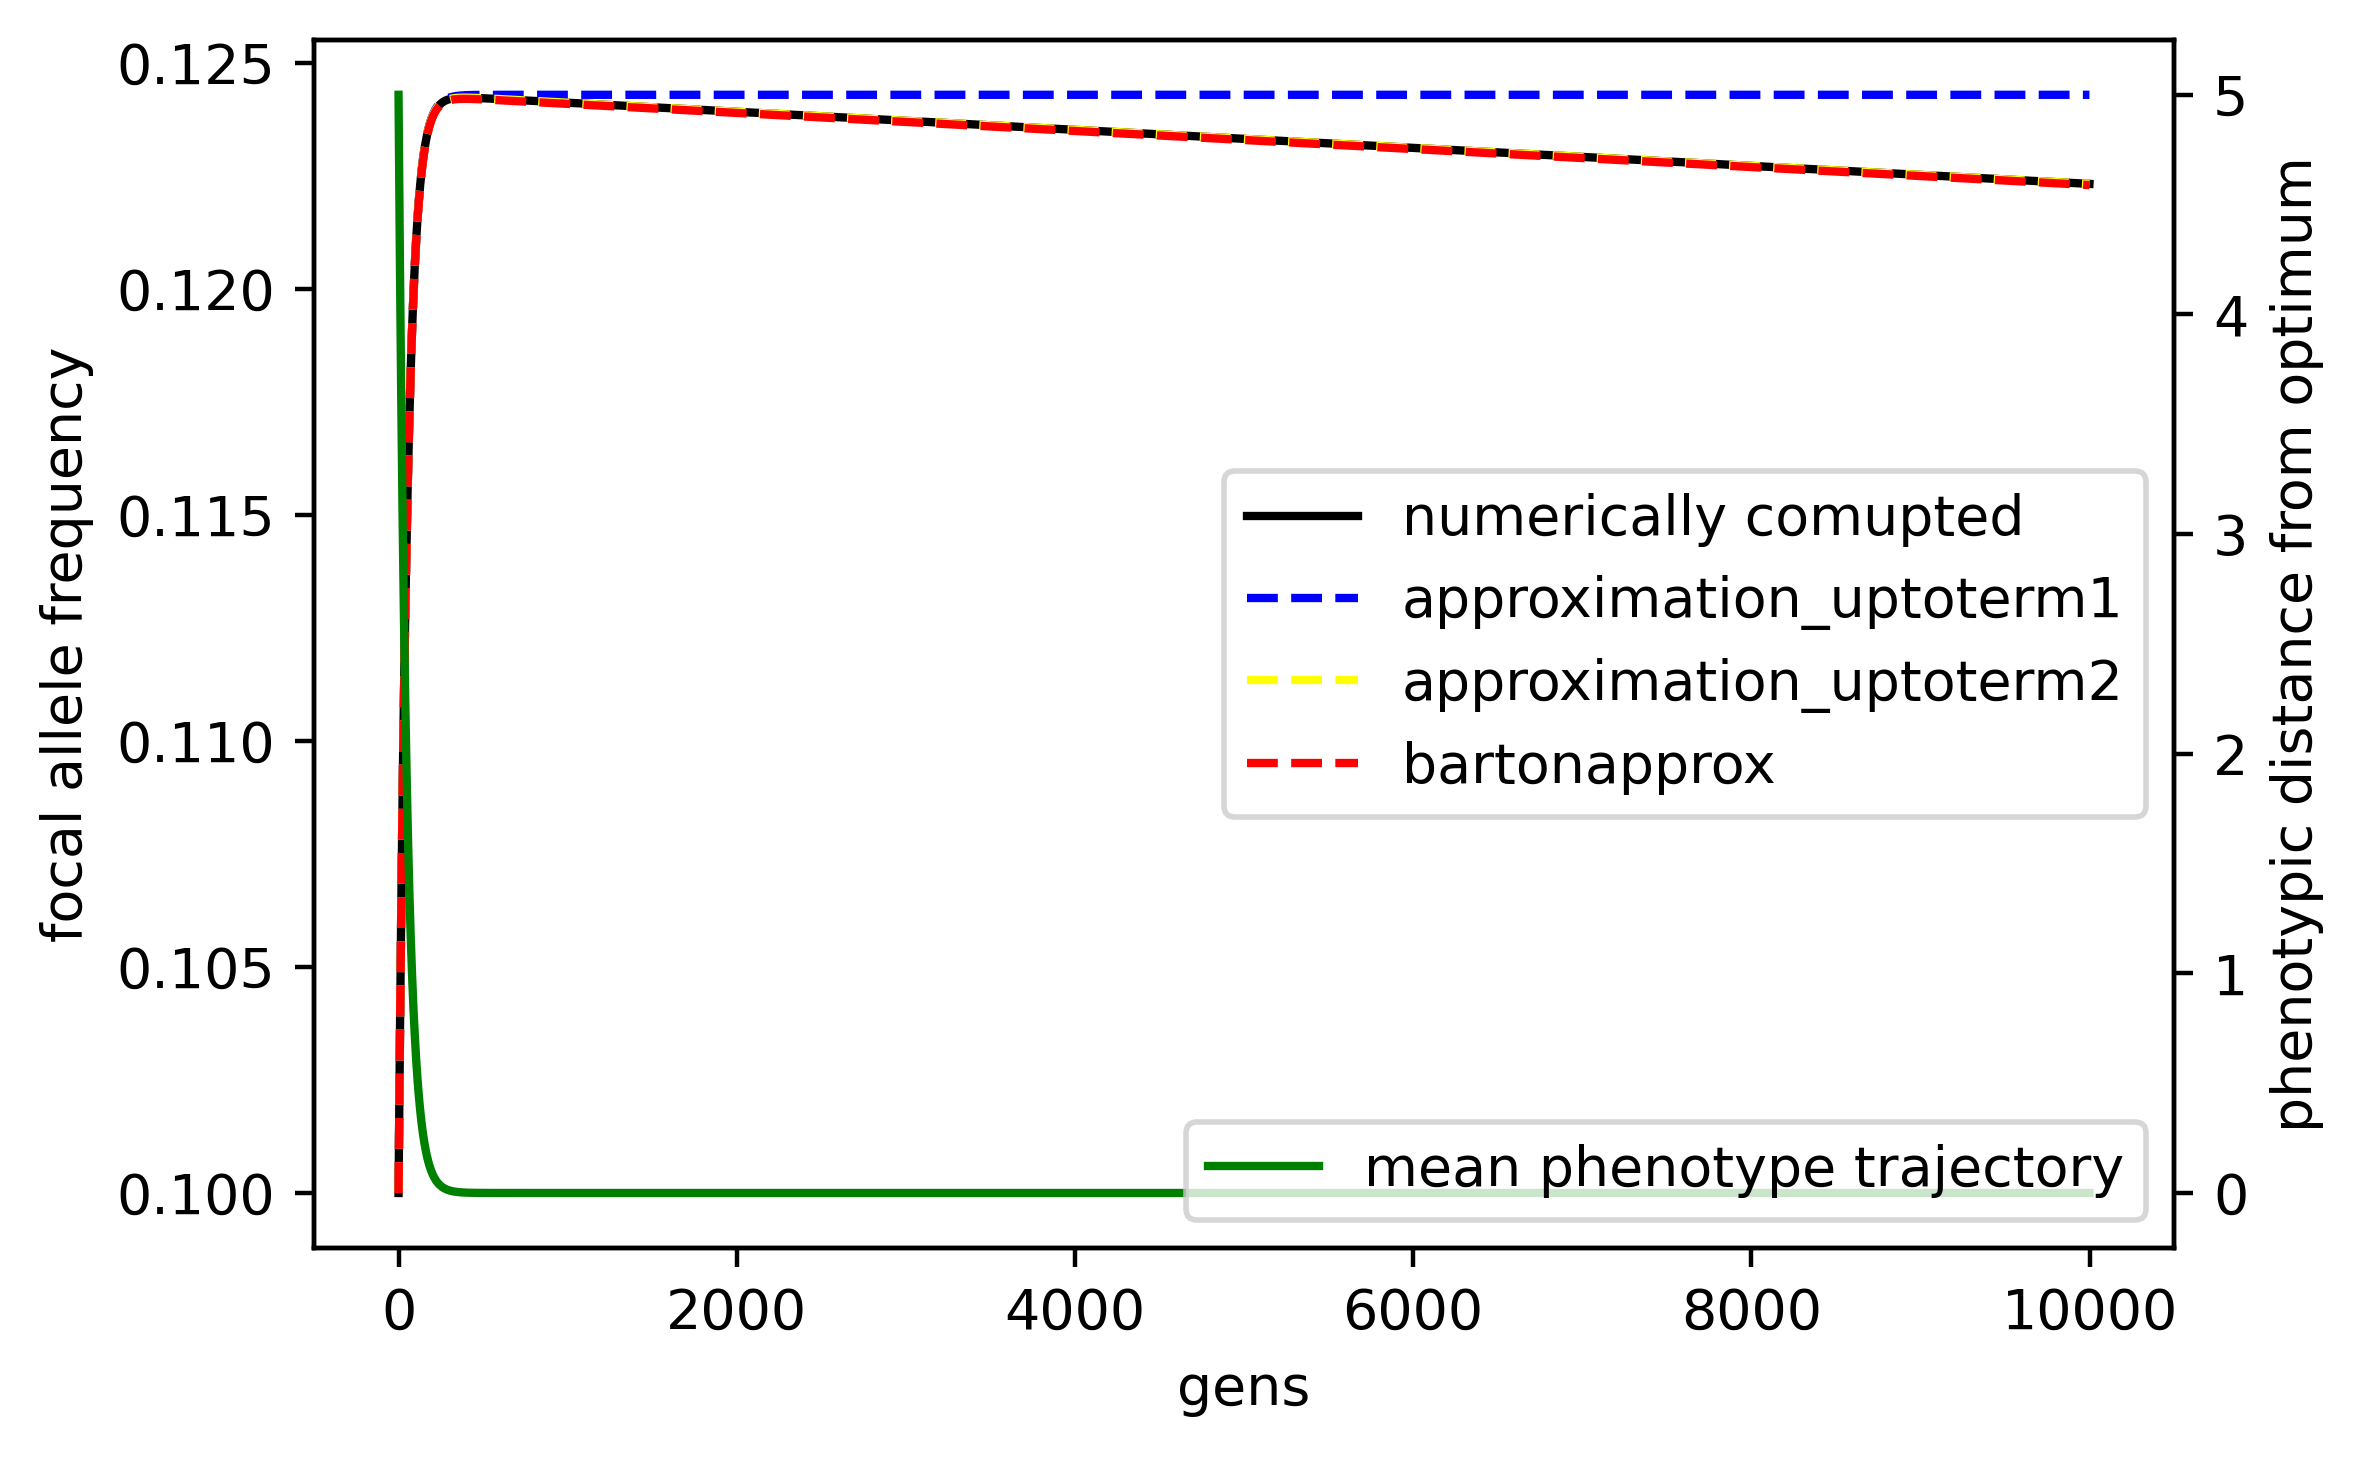

In [41]:
fig, ax1 = plt.subplots()

# Plotting the primary data on the left y-axis
ax1.plot(gens, mean_values, color='black', label='numerically comupted', linestyle='solid')
ax1.plot(gens, uptoterm1, color='blue', label='approximation_uptoterm1', linestyle='dashed')
ax1.plot(gens, uptoterm2, color='yellow', label='approximation_uptoterm2', linestyle='dashed')
ax1.plot(gens, bartonapprox, color='red', label='bartonapprox', linestyle='dashed')

ax1.set_xlabel('gens')
ax1.set_ylabel('focal allele frequency')
ax1.legend(loc='center right')


# Create a secondary y-axis
ax2 = ax1.twinx()

# Plotting the secondary data on the right y-axis
ax2.plot(gens, optimum_trajectory, color='green', label="mean phenotype trajectory", linestyle='solid')
ax2.set_ylabel('phenotypic distance from optimum')

# Add a legend for the secondary axis
ax2.legend(loc='lower right')

# Show the plot
plt.show()


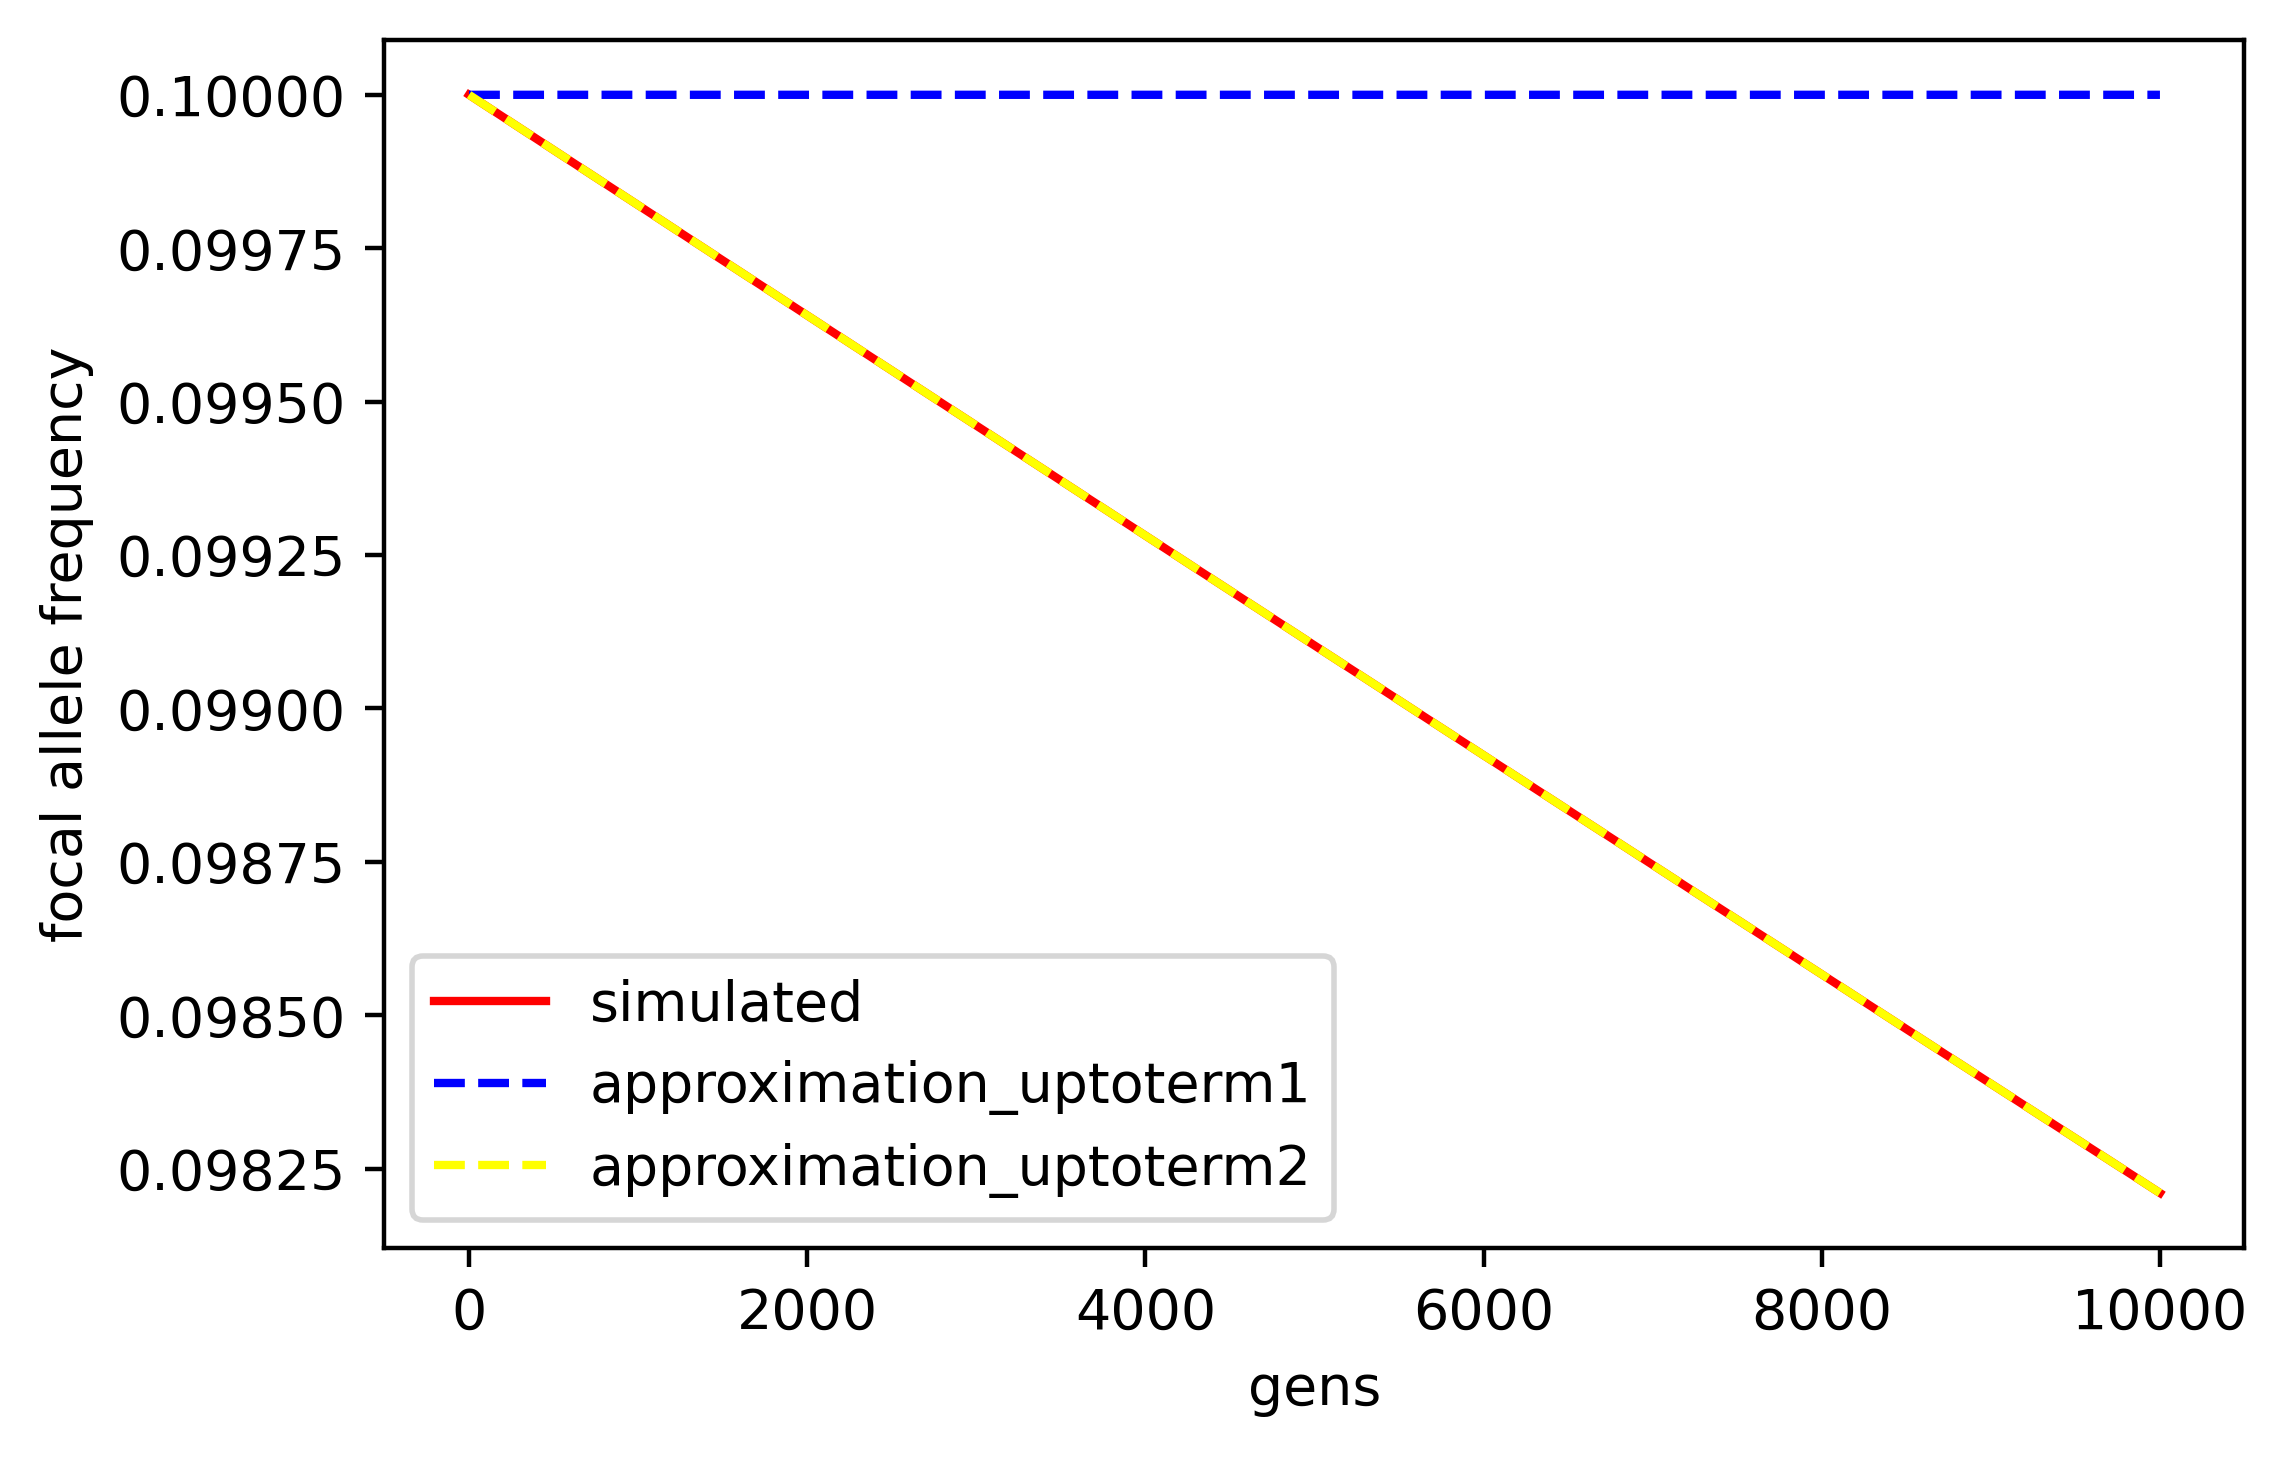

In [56]:
#for replicate in replicates_array:
#    plt.plot(gens, replicate, color='blue', alpha=0.1)

# Plotting the trend curve
plt.plot(gens, mean_values, color='red', label='simulated')
#plt.fill_between(gens, mean_values - std_values, mean_values + std_values, color='red', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
    # Show the plot

plt.plot(gens, uptoterm1, color='blue', label='approximation_uptoterm1', linestyle='dashed')

plt.plot(gens, uptoterm2, color='yellow', label='approximation_uptoterm2', linestyle='dashed')

plt.legend()

plt.ylabel("focal allele frequency")
plt.xlabel("gens")

plt.show()


0.1534288683784815

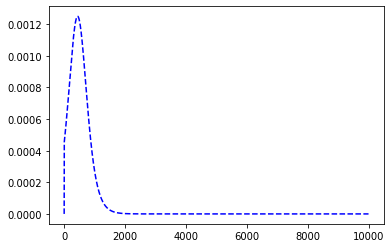

In [111]:
plt.plot(gens, term1_sol, color='blue', label='term2', linestyle='dashed')



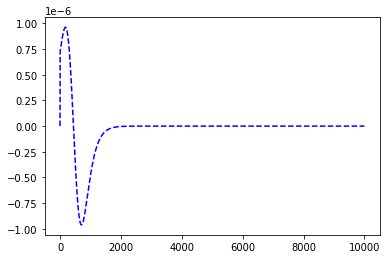

In [110]:
plt.plot(gens, term2_sol, color='blue', label='term2', linestyle='dashed')


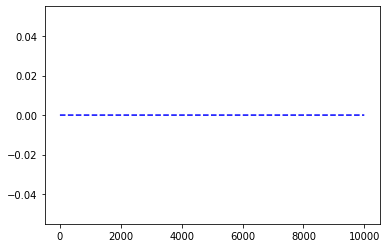

In [93]:
plt.plot(gens, term3_sol, color='blue', label='term2', linestyle='dashed')


In [94]:
#test 2
x=0.1
d=5
Va=0
Vs=5
a=0.005
N=20000
gens_n=10000

In [107]:
trajectory_simulated,optimum_trajectory=single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens_n)


0


In [108]:
optimum_trajectory[len-1]

5.0

In [112]:
approximate_solution,term1_sol,term2_sol,term3_sol=approximation_trajectory(x,d,Va,Vs,a,N,gens_n)

In [113]:
gens=list(range(gens_n))

In [114]:
replicates_array = np.array(trajectory_simulated)
mean_values = np.mean(trajectory_simulated, axis=0)
std_values = np.std(trajectory_simulated, axis=0)


In [115]:
mean_values

array([0.1       , 0.10045072, 0.10090324, ..., 1.        , 1.        ,
       1.        ])

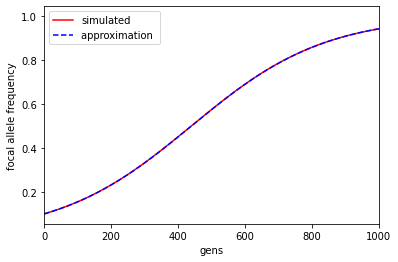

In [116]:
#for replicate in replicates_array:
#    plt.plot(gens, replicate, color='blue', alpha=0.1)

# Plotting the trend curve
plt.plot(gens, mean_values, color='red', label='simulated')
#plt.fill_between(gens, mean_values - std_values, mean_values + std_values, color='red', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
    # Show the plot

plt.plot(gens, approximate_solution, color='blue', label='approximation ', linestyle='dashed')
plt.legend()
plt.xlim(0,1000)
plt.ylabel("focal allele frequency")
plt.xlabel("gens")

plt.show()


Text(0, 0.5, 'distance from the optimum')

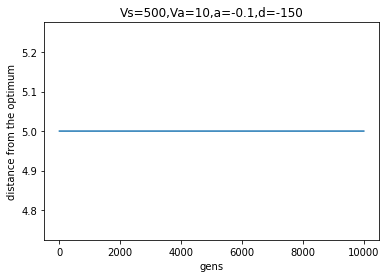

In [117]:
plt.plot(optimum_trajectory)
plt.xlabel("gens")
plt.title("Vs=500,Va=10,a=-0.1,d=-150")

plt.ylabel("distance from the optimum")

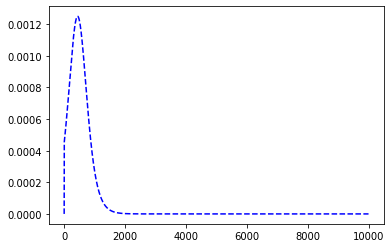

In [118]:

plt.plot(gens, term1_sol, color='blue', label='term3', linestyle='dashed')



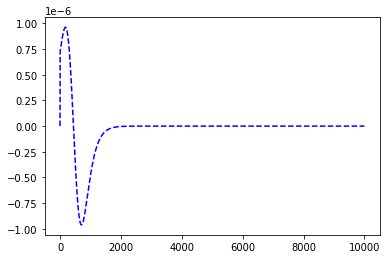

In [119]:
plt.plot(gens, term2_sol, color='blue', label='term3', linestyle='dashed')


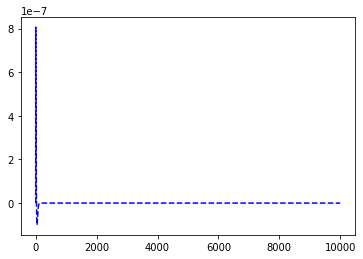

In [854]:

plt.plot(gens, term3_sol, color='blue', label='term3', linestyle='dashed')


In [120]:
#test 3
x=0.1
d=5
Va=0
Vs=5
a=0.005
N=20000
gens_n=10000

In [121]:
trajectory_simulated,optimum_trajectory=single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens_n)


0


Text(0, 0.5, 'distance from the optimum')

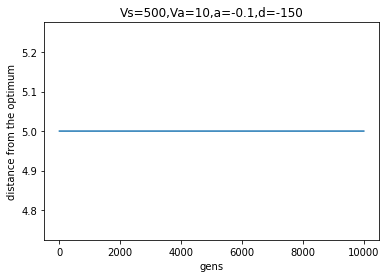

In [122]:
plt.plot(optimum_trajectory)
plt.xlabel("gens")
plt.title("Vs=500,Va=10,a=-0.1,d=-150")

plt.ylabel("distance from the optimum")

In [123]:
optimum_trajectory[len(optimum_trajectory)-1]

5.0

In [124]:
approximate_solution,term1_sol,term2_sol,term3_sol=approximation_trajectory(x,d,Va,Vs,a,N,gens_n)

In [125]:
gens=list(range(gens_n))

In [126]:
replicates_array = np.array(trajectory_simulated)
mean_values = np.mean(trajectory_simulated, axis=0)
std_values = np.std(trajectory_simulated, axis=0)


In [127]:
mean_values

array([0.1       , 0.10045072, 0.10090324, ..., 1.        , 1.        ,
       1.        ])

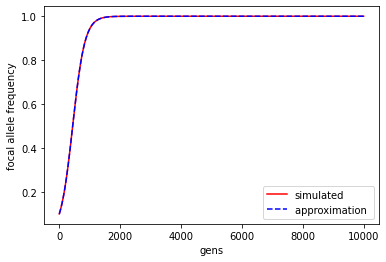

In [128]:
#for replicate in replicates_array:
#    plt.plot(gens, replicate, color='blue', alpha=0.1)

# Plotting the trend curve
plt.plot(gens, mean_values, color='red', label='simulated')
#plt.fill_between(gens, mean_values - std_values, mean_values + std_values, color='red', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
    # Show the plot

plt.plot(gens, approximate_solution, color='blue', label='approximation ', linestyle='dashed')
plt.legend()

plt.ylabel("focal allele frequency")
plt.xlabel("gens")

#plt.title("Vs=500,Va=10,a=-0.1,d=-150")
plt.show()


In [864]:
#test 4
x=0.6
d=0
Va=0.1
Vs=5
a=0.005
N=20000
gens_n=20000

In [865]:
trajectory_simulated,optimum_trajectory=single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens_n)


0


Text(0, 0.5, 'distance from the optimum')

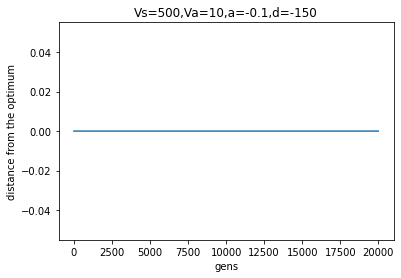

In [866]:
plt.plot(optimum_trajectory)
plt.xlabel("gens")
plt.title("Vs=500,Va=10,a=-0.1,d=-150")

plt.ylabel("distance from the optimum")

In [867]:
optimum_trajectory[len(optimum_trajectory)-1]

0

In [868]:
approximate_solution,term1_sol,term2_sol,term3_sol=approximation_trajectory(x,d,Va,Vs,a,N,gens_n)

TypeError: 'list' object is not callable

In [869]:
gens=list(range(gens_n))

In [461]:
replicates_array = np.array(trajectory_simulated)
mean_values = np.mean(trajectory_simulated, axis=0)
std_values = np.std(trajectory_simulated, axis=0)


In [462]:
mean_values

array([0.1       , 0.09999982, 0.09999964, ..., 0.09821091, 0.09821073,
       0.09821055])

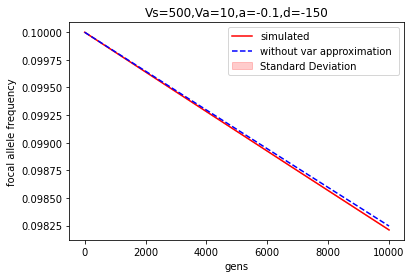

In [463]:
#for replicate in replicates_array:
#    plt.plot(gens, replicate, color='blue', alpha=0.1)

# Plotting the trend curve
plt.plot(gens, mean_values, color='red', label='simulated')
plt.fill_between(gens, mean_values - std_values, mean_values + std_values, color='red', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
    # Show the plot

plt.plot(gens, approximate_solution, color='blue', label='without var approximation ', linestyle='dashed')
plt.legend()

plt.ylabel("focal allele frequency")
plt.xlabel("gens")

plt.title("Vs=500,Va=10,a=-0.1,d=-150")
plt.show()


In [191]:
#test 5
x=0.6
d=50
Va=0.1
Vs=5
a=0.005
N=20000
gens_n=20000

In [192]:
trajectory_simulated,optimum_trajectory=single_allele_simulation_trajectory(x,d,Va,Vs,a,N,gens_n)


0


Text(0, 0.5, 'distance from the optimum')

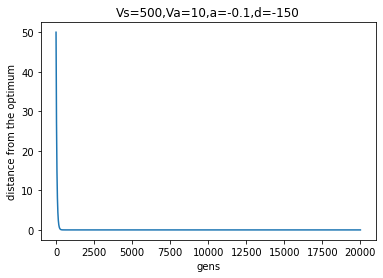

In [193]:
plt.plot(optimum_trajectory)
plt.xlabel("gens")
plt.title("Vs=500,Va=10,a=-0.1,d=-150")

plt.ylabel("distance from the optimum")

In [194]:
optimum_trajectory[len(optimum_trajectory)-1]

0

In [195]:
approximate_solution,term1_sol,term2_sol,term3_sol=approximation_trajectory(x,d,Va,Vs,a,N,gens_n)

In [196]:
gens=list(range(gens_n))

In [197]:
replicates_array = np.array(trajectory_simulated)
mean_values = np.mean(trajectory_simulated, axis=0)
std_values = np.std(trajectory_simulated, axis=0)


In [198]:
mean_values

array([0.6       , 0.6117051 , 0.62305252, ..., 0.94785547, 0.94785558,
       0.94785569])

In [199]:
mean_values

array([0.6       , 0.6117051 , 0.62305252, ..., 0.94785547, 0.94785558,
       0.94785569])

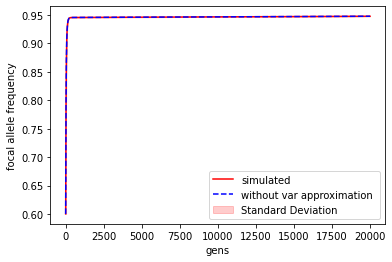

In [200]:
#for replicate in replicates_array:
#    plt.plot(gens, replicate, color='blue', alpha=0.1)

# Plotting the trend curve
plt.plot(gens, mean_values, color='red', label='simulated')
plt.fill_between(gens, mean_values - std_values, mean_values + std_values, color='red', alpha=0.2, label='Standard Deviation')

# Add labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
    # Show the plot

plt.plot(gens, approximate_solution, color='blue', label='without var approximation ', linestyle='dashed')
plt.legend()

plt.ylabel("focal allele frequency")
plt.xlabel("gens")

plt.show()


In [474]:
# testing approximation terms

In [475]:
x=0.1
d=5
Va=0.1
Vs=5
a=0.005
N=20000
gens_n=20000

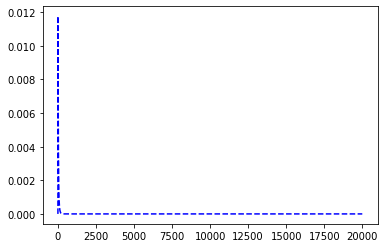

In [476]:
plt.plot(gens, term1_sol, color='blue', label='term2', linestyle='dashed')


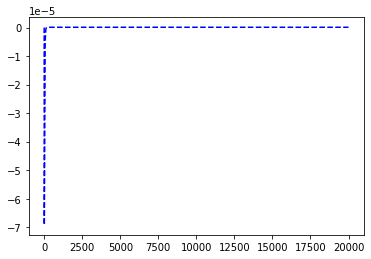

In [477]:
plt.plot(gens, term2_sol, color='blue', label='term2', linestyle='dashed')


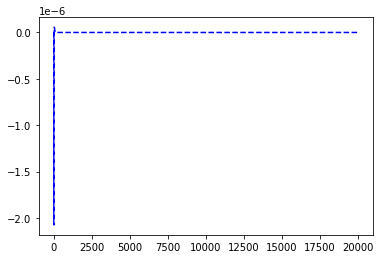

In [478]:
plt.plot(gens, term3_sol, color='blue', label='term2', linestyle='dashed')
